In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('train_SII.csv')

df.head()

# 0 = Male , 1 = female 
# Season of  enrollment = Summer/Winter/Fall/Spring

# Season of Particiaption: CGAS-Season (Assessment participation)

# Score - Assessment Scale Score = to rate the general functioning of youths under the age of 18

# Physical Season of Participation : Season (when they we're measuing physical data)

# BMI - Body Mass Index 

# Waist circumference??? Why? 

# 3. Fitness Endurance Sesssion 

# FitnessGramChild? What are those varaibles : 
# Health related physical fitness assessment measuring five different parameters :
# including aerobic capacity, muscular strength, muscular endurance, flexibility, and body composition


# Physcial Activity Questionnaire : PAQ 



,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.info()

# 80 Variables + 1 Target (sii)

# SII somewhere is not filled - Artifically Add using supervies algorithms 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = df.drop(columns=['id', 'sii'])
y = df['sii']

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Impute missing values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[('imputer', numerical_imputer), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', categorical_imputer), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define a basic model pipeline with Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])


In [9]:
y_train

1287    0.0
3820    0.0
1257    2.0
1587    2.0
55      1.0
       ... 
3520    0.0
3463    0.0
691     2.0
3666    1.0
2897    2.0
Name: sii, Length: 2188, dtype: float64

In [43]:
# hadling missing values:

# Remove rows with missing target values in 'sii'
data_cleaned = df.dropna(subset=['sii'])

# Separate features and target after cleaning
X_cleaned = data_cleaned.drop(columns=['id', 'sii'])
y_cleaned = data_cleaned['sii']

# Split the cleaned data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

# Fit the model on the cleaned training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)

print()

print(classification_report(y_test, y_pred))


0.9981751824817519

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       319
         1.0       0.99      1.00      1.00       146
         2.0       1.00      0.99      0.99        76
         3.0       1.00      1.00      1.00         7

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



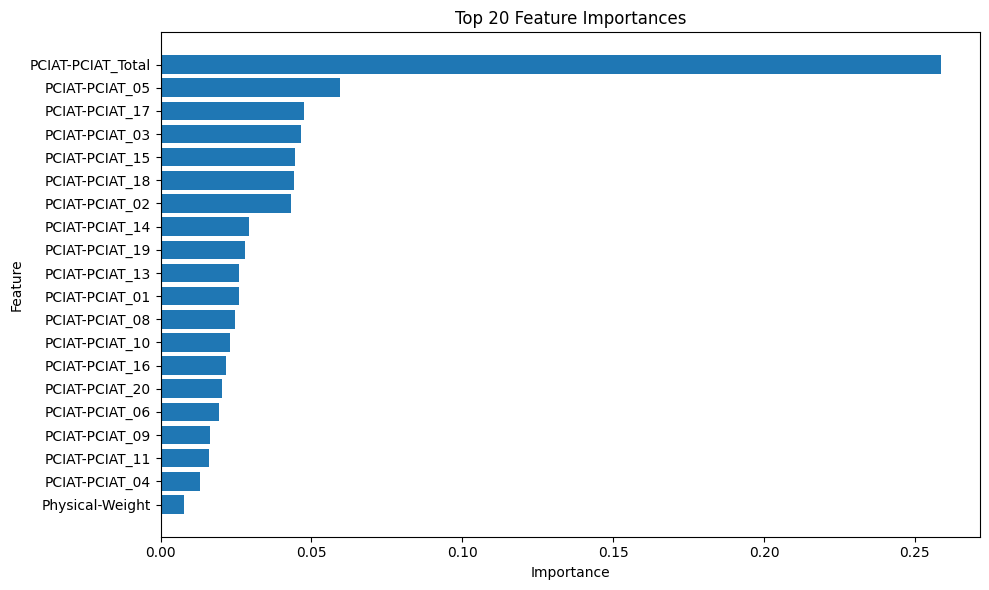

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance from the trained Random Forest model
feature_importances = model.named_steps['classifier'].feature_importances_
feature_names = preprocessor.transformers_[0][2].tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()



# Trying with Neural Networks:

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

2024-12-01 20:15:50.257796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing pipeline
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convert the target variable to categorical format for neural network classification
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# Build a simple feedforward neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_nn.shape[1], activation='softmax')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
history = nn_model.fit(X_train_scaled, y_train_nn, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test_scaled, y_test_nn, verbose=1)

print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6040 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5777 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5829 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5899 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5799 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5845 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5939 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5796 - loss: nan - val_accuracy: 0.5571 - val_loss: nan
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6m

# SURROGATE MODEL FOR THE TARGET SII

In [ ]:
# so, we basically first predict the sii-values without missing vals and then apply this model to the missing targets!

# Surrogate Model here --> GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Separate rows with and without missing target values
data_with_target = df.dropna(subset=['sii'])
data_missing_target = df[df['sii'].isnull()]

# Features and target for the rows with complete target values
X_complete = data_with_target.drop(columns=['id', 'sii'])
y_complete = data_with_target['sii']

# Features for the rows with missing target values
X_missing = data_missing_target.drop(columns=['id', 'sii'])

# Preprocessing pipeline for features
preprocessor.fit(X_complete)

# Transform both datasets
X_complete_transformed = preprocessor.transform(X_complete)
X_missing_transformed = preprocessor.transform(X_missing)

# Train a model to predict the missing target values
surrogate_model = GradientBoostingRegressor(random_state=42)
surrogate_model.fit(X_complete_transformed, y_complete)

# Predict missing target values
predicted_sii = surrogate_model.predict(X_missing_transformed)

# Fill in the missing target values
df.loc[df['sii'].isnull(), 'sii'] = predicted_sii

# Check the updated dataset
missing_after_imputation = df['sii'].isnull().sum()

missing_after_imputation, df.head()


(0,
          id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
 0  00008ff9                      Fall                5                0   
 1  000fd460                    Summer                9                0   
 2  00105258                    Summer               10                1   
 3  00115b9f                    Winter                9                0   
 4  0016bb22                    Spring               18                1   
 
   CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
 0      Winter             51.0            Fall     16.877316             46.0   
 1         NaN              NaN            Fall     14.035590             48.0   
 2        Fall             71.0            Fall     16.648696             56.5   
 3        Fall             71.0          Summer     18.292347             56.0   
 4      Summer              NaN             NaN           NaN              NaN   
 
    Physical-Weight  ...  PCIAT-PCIAT_18  PC

In [46]:
# Recalculate the percentage of missing values for each feature
missing_percentage = df.isnull().mean() * 100

# Identify features with more than 50% missing values
features_with_high_missing = missing_percentage[missing_percentage > 50]

# Convert to DataFrame for better formatting
features_with_high_missing_df = features_with_high_missing.reset_index()
features_with_high_missing_df.columns = ['Feature', 'Missing_Percentage']

# Display the features and their missing percentages
print("Features with more than 50% missing values:\n")
print(features_with_high_missing_df.to_string(index=False))


Features with more than 50% missing values:

                     Feature  Missing_Percentage
Physical-Waist_Circumference           77.323232
    Fitness_Endurance-Season           66.969697
 Fitness_Endurance-Max_Stage           81.237374
 Fitness_Endurance-Time_Mins           81.313131
  Fitness_Endurance-Time_Sec           81.313131
                FGC-FGC_GSND           72.878788
           FGC-FGC_GSND_Zone           73.181818
                 FGC-FGC_GSD           72.878788
            FGC-FGC_GSD_Zone           73.156566
                PAQ_A-Season           88.005051
           PAQ_A-PAQ_A_Total           88.005051
                PAQ_C-Season           56.540404
           PAQ_C-PAQ_C_Total           56.540404


In [48]:
y.value_counts()

0.000000    1594
1.000000     730
0.000015     613
2.000000     378
0.000015     358
0.000015     203
0.000015      37
3.000000      34
0.000015       9
0.000015       3
0.000015       1
Name: sii, dtype: int64

In [50]:
# Remove features with more than 50% missing values from the dataset
data_cleaned = df.drop(columns=features_with_high_missing.index)

# Separate features and target after cleaning
X = data_cleaned.drop(columns=['id', 'sii'])
y = data_cleaned['sii']

# Split the cleaned data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the data
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_transformed, y_train)
y_pred_rf = random_forest_model.predict(X_test_transformed)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_transformed, y_train)
y_pred_xgb = xgb_model.predict(X_test_transformed)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Train Ensemble Model (VotingClassifier)
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', random_forest_model),
        ('xgb', xgb_model)
    ], voting='soft'
)
ensemble_model.fit(X_train_transformed, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_transformed)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

# Output results
rf_accuracy, xgb_accuracy, ensemble_accuracy


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [52]:
# Recalculate the target distribution after combining rare classes
target_distribution_cleaned = y_combined.value_counts()

# Display the recalculated target distribution
target_distribution_cleaned


0.000000    1594
1.000000     730
0.000015     613
2.000000     378
0.000015     358
0.000015     203
0.000015      37
3.000000      34
0.000015       9
0.000015       3
0.000015       1
Name: sii, dtype: int64

In [53]:
# Combine Rare Classes (after teh surogg.model we got those rare classes)
# Define a threshold for rare classes (e.g., fewer than 50 samples)
rare_class_threshold = 50

# Combine rare classes into a single "other" category
y_combined = y.copy()
rare_classes = target_distribution_cleaned[target_distribution_cleaned < rare_class_threshold].index
y_combined = y_combined.replace(rare_classes, -1)  # Replace rare classes with a new category (-1)

# Check the updated distribution of the target variable
updated_target_distribution = y_combined.value_counts()

updated_target_distribution


 0.000000    1594
 1.000000     730
 0.000015     613
 2.000000     378
 0.000015     358
 0.000015     203
-1.000000      84
Name: sii, dtype: int64

In [65]:
# Okay, we combined that rare-weird cases and now return to the modelling:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Update the target variable with combined rare classes
y_updated = y_combined

# Remove features with more than 50% missing values
features_with_high_missing = data_cleaned.isnull().mean() > 0.5
data_cleaned = data_cleaned.drop(columns=features_with_high_missing[features_with_high_missing].index)

# Separate features and updated target
X = data_cleaned.drop(columns=['id', 'sii'])
y = y_updated

# Split the cleaned data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Ensure target variable is integer-encoded
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_transformed, y_train)
y_pred_rf = random_forest_model.predict(X_test_transformed)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)



# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_transformed, y_train)



# Train Ensemble Model (VotingClassifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', random_forest_model),
        ('lr', logistic_model)  # Logistic Regression instead of XGBoost
    ], voting='soft'
)
ensemble_model.fit(X_train_transformed, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_transformed)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

# Output results
print("Random Forest Accuracy:", rf_accuracy)

print("Ensemble Accuracy:", ensemble_accuracy)


Random Forest Accuracy: 0.9911616161616161
Random Forest Accuracy: 0.9911616161616161
Ensemble Accuracy: 0.9545454545454546


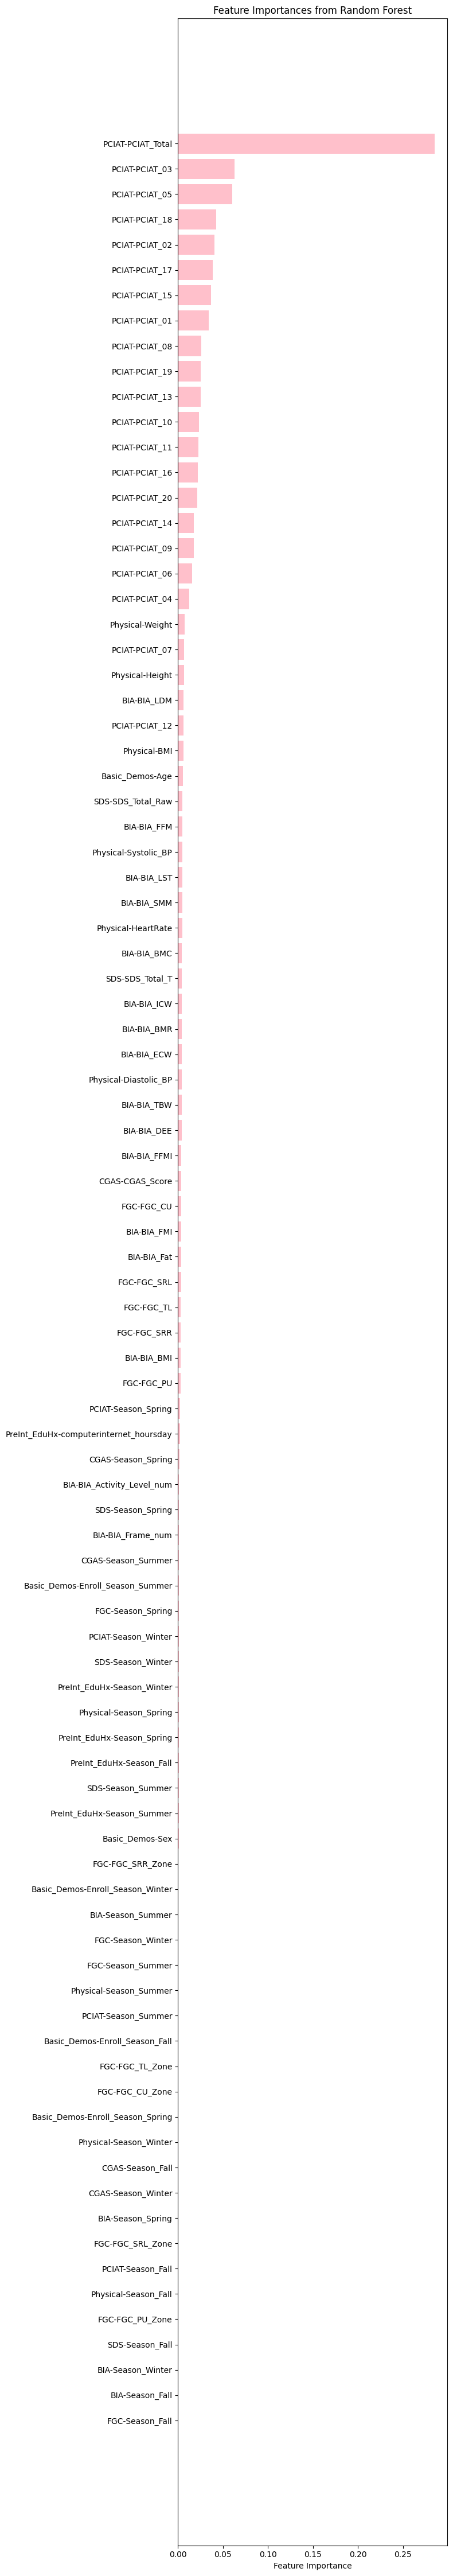

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the trained model
feature_importances = random_forest_model.feature_importances_

# Get feature names after preprocessing
# Extract numerical and one-hot encoded feature names
numerical_features_names = numerical_features.tolist()
categorical_features_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

# Combine all feature names
all_feature_names = numerical_features_names + categorical_features_names

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = np.array(all_feature_names)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create a vertical heatmap
plt.figure(figsize=(8, len(sorted_features) // 2))
plt.barh(sorted_features, sorted_importances, color='pink')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

